Type your Password Here: ········
uei81k
uei8a6
ueisa6
ueisa6
ueisa6
ueisa6
ueisa6
ueisa6
ueisa6
ueisa6
ueisa6
ueisa6
ueisa6
ueisa6
ueisa6
ueisa6
ueisa6
ueisa6
ueisal
ueisal
ueisal
uaisal
uaisal
Haisal
Haisal
Haisal
Haisal
Haisal
Haisal
Haisal
Haisal
Haisal
Haisal
Haisal
Haisal
Haisal
Haisal
Haisal
Haisal
Haisal
Haisal
Haisal
Haisal
Haisal
Haisal
Haisal
Haisal
Haisal
Haisal
Haisal
Haisal
Haisal
Haisal
Haisal
Haisal
Haisal
Haisal
Haisal
Haisal
Haisal
Haisal
Haisal
Haisal
8aisal
8aisal
8aisal
8aisal
8aisal
8aisal
8aisal
8aisal
8aisal
8aisal
8aisal
8aisal
8aisal
8aisal
8aisal
8aisal
8aisal
8aisal
8aisal
8aisal
8aisal
8aisal
8aisal
8aisal
8aisal
8aisal
8aisal
8aisal
8aisal
8aisal
8aisal
8aisal
8aisal
8aisal
8aisal
8aisal
8aisal
8aisal
8aisal
8aisal
8aisal
8aisal
8aisal
8aisal
8aisal
8aisal
8aisal
8aisal
8aisal
8aisal
8aisal
8aisal
8aisal
8aisal
8aisal
8aisal
8aisal
8aisal
8aisal
8aisal
8aisal
8aisal
8aisal
8aisal
8aisal
8aisal
8aisal
8aisal
8aisal
8aisal
8aisal
8aisal
8aisal
8aisal
8aisal


<ipython-input-3-b6631a885df5>:127: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(111)


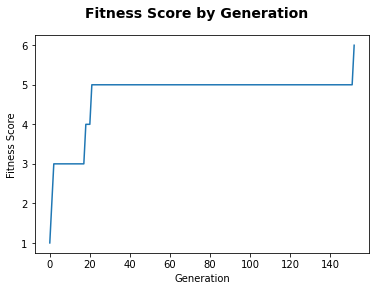

In [3]:
import random
import numpy as np
import matplotlib.pyplot as plt
import time
import string
import matplotlib.animation as animation
from getpass import getpass

character_list = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', '!', '#', '$', '&', '*', '+',  '-', '/',  '<', '=', '>', '?', '@', '[', ']', '^', '_', '`']

secret_pass=getpass("Type your Password Here: ")
secret_password=list(secret_pass)

password_length = len(secret_password)

population_size = 100

num_parents = 20

elite_size = 2

population = []
for i in range(population_size):

    chromosome = []
    for x in range(password_length):
        chromosome.append(random.choice(character_list))

    population.append(chromosome)


    
# fitness scoring
def fitness(population):
    fitness_scores = []
    for chromosome in population:
        matches = 0
        for index in range(password_length):
            if secret_password[index] == chromosome[index]:
                matches += 1
        result = [chromosome,matches]
        fitness_scores.append(result)
    return fitness_scores

# parent selection
def select_parents(fitness_scores):
    parents_list = []
    for chromosome in sorted(fitness_scores, key=lambda x: x[1], reverse = True)[:num_parents]:
        parents_list.append(chromosome[0])
    return(parents_list)

# breeding logic
def breed(parent1,parent2):
    child = []

    parent1 = parents[0]
    parent2 = parents[1]

    geneA = int(random.random() * password_length)
    geneB = int(random.random() * password_length)

    startGene = min(geneA, geneB)
    endGene = max(geneA, geneB)

    for i in range(0,password_length):
        if (i < startGene) or (i > endGene):
            child.append(parent1[i])
        else:
            child.append(parent2[i])
    return child

# breeding and elitism
def create_children(parents_pool):
    children = []
    num_new_children = len(population) - elite_size

    for i in range(0,elite_size):
        children.append(parents_pool[i])

    for i in range(0,num_new_children):
        parent1 = parents_pool[int(random.random() * len(parents_pool))]
        parent2 = parents_pool[int(random.random() * len(parents_pool))]
        children.append(breed(parent1,parent2))
    return children

# mutation
def mutation(children_set):
    for i in range(len(children_set)):
        if random.random() > 0.1:
            continue
        else:
            mutated_position = int(random.random() * password_length)
            mutation = random.choice(character_list)
            children_set[i][mutated_position] = mutation
    return children_set




# run Algorithm


fitness_tracker = []
solutions = []
generations = 0
t0 = time.time()
while True:

    fitness_scores = fitness(population)
    fitness_tracker.append(max([i[1] for i in fitness_scores]))
    solutions.append(''.join([i[0] for i in fitness_scores if i[1] == max([i[1] for i in fitness_scores])][0]))
    print(''.join([i[0] for i in fitness_scores if i[1] == max([i[1] for i in fitness_scores])][0]))
    if max([i[1] for i in fitness_scores]) == password_length:
        print("Cracked in {} generations, and {} seconds! \nSecret passcode = {} \nDiscovered passcode = {}".format(generations,time.time() - t0,''.join(secret_password),''.join([i[0] for i in fitness_scores if i[1] == password_length][0])))
        break
    parents = select_parents(fitness_scores)
    children = create_children(parents)
    population = mutation(children)
    generations += 1


    

fig = plt.figure()
plt.plot(list(range(generations+1)), fitness_tracker)
fig.suptitle('Fitness Score by Generation', fontsize=14, fontweight='bold')
ax = fig.add_subplot(111)
ax.set_xlabel('Generation')
ax.set_ylabel('Fitness Score')
plt.show()